In [60]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import norm
from sklearn.model_selection import train_test_split #used to split a dataset into training and testing sets.
from sklearn.preprocessing import StandardScaler #used to standardize features by removing the mean and scaling to unit variance.
from sklearn.ensemble import RandomForestClassifier #code trains a Random Forest classifier on the Iris dataset and evaluates its accuracy on unseen test data.
from sklearn.metrics import classification_report #provides a detailed performance evaluation of a classification model. 

# **Introduction to AI in the Workforce: A Job Market Analysis**
This analysis delves into the "AI-Powered Job Market Insights" dataset, offering a comprehensive exploration of how artificial intelligence (AI) and automation are influencing the modern job market. The dataset provides a snapshot of job listings across various industries, highlighting factors such as AI adoption levels, automation risk, and salary ranges. By examining these elements, we aim to uncover key trends and insights into how AI is reshaping employment opportunities and job market dynamics.

**Objective**
The primary objective of this analysis is to identify and understand key patterns related to salaries, required skills, remote work, and job market trends influenced by AI. By employing various analytical techniques, we seek to reveal how AI adoption impacts compensation, skill requirements, and job growth, as well as how it correlates with the likelihood of remote work.

**Data Overview**
The dataset includes the following key features:

- Job_Title: The title of the job role.
- Industry: The industry in which the job is located.
- Company_Size: The size of the company offering the job.
- Location: The geographic location of the job.
- AI_Adoption_Level: The extent to which the company has adopted AI in its operations.
- Automation_Risk: The estimated risk of the job being automated within the next 10 years.
- Required_Skills: The key skills required for the job role.
- Salary_USD: The annual salary offered for the job in USD.
- Remote_Friendly: Indicates whether the job can be performed remotely.
- Job_Growth_Projection: The projected growth or decline of the job role over the next five years.

**Analysis Highlights**
- Distribution of Salaries Across Industries and AI Adoption Levels: A box plot will illustrate how salaries differ across various industries, segmented by AI adoption levels. This analysis will help identify high-paying industries and assess the impact of AI on compensation.
- Skill Frequency Analysis: A count plot will show the frequency of required skills, segmented by AI adoption levels. This will reveal which skills are more common in roles with high AI adoption.
- Correlation Matrix: A heatmap will explore the relationships between numerical features such as salary, AI adoption, automation risk, and job growth. This will uncover trends and correlations, such as whether higher AI adoption is linked to increased salaries or reduced automation risk.
- AI Adoption Level Impact on Remote Work: A heatmap will examine the relationship between AI adoption levels and the likelihood of a job being remote-friendly, exploring if AI adoption promotes remote work opportunities.
- Industry-Specific Salary Distribution: A focused box plot will analyze salary distributions within the Technology industry, segmented by AI adoption level and automation risk, providing deeper insights into compensation within this sector.
- Clustering Analysis: KMeans clustering will group similar job roles based on AI adoption level, automation risk, and salary, helping to identify patterns and categorize jobs with similar characteristics.
- Point-Biserial Correlation: An analysis of the point-biserial correlation will explore the relationship between AI adoption levels and the correlation between remote work and salary, revealing how AI adoption influences this dynamic.

By combining these analyses, this report aims to provide a thorough understanding of how AI is transforming the job market, offering valuable insights into compensation trends, skill demands, and employment opportunities in an AI-driven landscape.

In [61]:
job_Market= pd.read_csv(r"C:\Users\garet\Downloads\Gareth-ai_job_market_insights.csv")

# 1. Initial Data Inspection

In [62]:
job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [63]:
job_Market.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [64]:
job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [76]:
# Convert categorical columns using one-hot encoding
job_Market = pd.get_dummies(job_Market, columns=['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Remote_Friendly', 'Job_Growth_Projection'], drop_first=True)

# Check the encoded dataset
print(job_Market.head())

# This code takes a DataFrame with categorical columns and transforms them into 
# numerical format using one-hot encoding.

      Salary_USD  Job_Title_Cybersecurity Analyst  Job_Title_Data Scientist  \
0  111392.165243                             True                     False   
1   93792.562466                            False                     False   
2  107170.263069                            False                     False   
3   93027.953758                            False                     False   
4   87752.922171                             True                     False   

   Job_Title_HR Manager  Job_Title_Marketing Specialist  \
0                 False                           False   
1                 False                            True   
2                 False                           False   
3                 False                           False   
4                 False                           False   

   Job_Title_Operations Manager  Job_Title_Product Manager  \
0                         False                      False   
1                         False               

# 2. Checking for Missing Values

In [77]:
print("\nMissing Values:")
missing_values = job_Market.isnull().sum()
print(missing_values)


Missing Values:
Salary_USD                            0
Job_Title_Cybersecurity Analyst       0
Job_Title_Data Scientist              0
Job_Title_HR Manager                  0
Job_Title_Marketing Specialist        0
Job_Title_Operations Manager          0
Job_Title_Product Manager             0
Job_Title_Sales Manager               0
Job_Title_Software Engineer           0
Job_Title_UX Designer                 0
Industry_Energy                       0
Industry_Entertainment                0
Industry_Finance                      0
Industry_Healthcare                   0
Industry_Manufacturing                0
Industry_Retail                       0
Industry_Technology                   0
Industry_Telecommunications           0
Industry_Transportation               0
Company_Size_Medium                   0
Company_Size_Small                    0
Location_Dubai                        0
Location_London                       0
Location_New York                     0
Location_Paris         

# 3. Checking for Duplicates

In [78]:
print("\nChecking for Duplicates:")
duplicates = job_Market.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
job_Market.drop_duplicates(inplace=True)


Checking for Duplicates:
Number of duplicate rows: 0


In [79]:
job_Market[job_Market['Job_Title'].duplicated(keep=False)]

KeyError: 'Job_Title'

In [ ]:
job_Market.isnull().sum()  #TO CHECK FOR DUPLICATED COLUMNS

In [ ]:
job_Market[job_Market.duplicated()] #TO CHECK FOR ANY OUTLIERS

In [ ]:
#lets get the unique job titles in a dataframe
job_titles = job_Market['Job_Title'].unique()
job_titles_df = pd.DataFrame(job_titles, columns=['Job_Title'])
job_titles_df

In [ ]:
industries = job_Market['Industry'].unique()
industries_df = pd.DataFrame(industries, columns=['Industry'])

industries_df

In [ ]:
location = job_Market['Location'].unique() 
           
hotspots = pd.DataFrame(location, columns=['Location'] )
hotspots

# 4.Analysis and Visualization

# Job Title

In [ ]:
job_Market.Job_Title.value_counts()

The above data is the analysis of the total count data of job titles in the dataset

In [ ]:
value_counts = job_Market['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count']
fig = px.bar(
    value_counts,
    x='Job_Title',
    y='Count',
    title='Job Title Counter',
    labels={'Count': 'Count', 'Job_Title': 'Job Title'},
    color='Count', 
    color_continuous_scale='Viridis'  
)
fig.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    title_x=0.5,  
    xaxis=dict(
        tickangle=-45  
    )
)


fig.show()

The above displays a visualisation of the total Job Title count  it allows us to quickly identify the most common job titles and compare their frequencies, which can be valuable for understanding the composition of the dataset.

# Company Sizes

In [ ]:
value_counts = job_Market['Company_Size'].value_counts().reset_index()
value_counts

The above data is the analysis of the total count data of company sizes in the dataset

In [80]:
value_counts.columns = ['Company_Size', 'Count']

fig = px.pie(
    value_counts,
    names='Company_Size',
    values='Count',
    title='Distribution of Company Sizes',
    color='Company_Size',  # Optional: color segments by company size
    color_discrete_map={'Small': 'blue', 'Medium': 'green', 'Large': 'red'}  # Customize colors
)

fig.update_layout(
    title_x=0.5 
)

fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['count'] but received: Company_Size

The above Visualisation is an Interactive Pie Chart it allows identify the percentage distribution between Small,Large and Medium companies within the  dataset this gives a clear understanding of how companie sizes are distrubuted in the dataset.

# Location

In [ ]:
job_Market.Location.value_counts()

In [ ]:
value_counts = job_Market['Location'].value_counts()

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Location Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above Visualisation is a Bar Chart it allows us to  identify the Locations aligning them with to Job titles found within the dataset.This allows us to view how many individuals are employed in the various Locations.

# Salary 

In [ ]:
#mean
mean_salary = job_Market['Salary_USD'].mean()
print('The Mean Salary in USD is:',mean_salary)

#median
median_salary = job_Market['Salary_USD'].median()
print("The Median Salary in USD is:", median_salary)

#standard deviation
std_salary = job_Market['Salary_USD'].std()
print("The Standard Deviation of Salary in USD is:", std_salary)

In [ ]:
# Step 1: Calculate Q1, Q3, and IQR
Q1 = job_Market['Salary_USD'].quantile(0.25)
Q3 = job_Market['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
median_salary = job_Market['Salary_USD'].median()
job_Market.loc[(job_Market['Salary_USD'] < lower_bound) | (job_Market['Salary_USD'] > upper_bound), 'Salary_USD'] = median_salary

The above code allows the replacement of OUTLIERS with the Median

In [81]:
Salary = job_Market.sort_values(by=['Salary_USD'], ascending=[False])   #T0 SEE WHICH JOBS HAVE THE HIGHEST SALARY
print(Salary)

        Salary_USD  Job_Title_Cybersecurity Analyst  Job_Title_Data Scientist  \
420  155209.821614                            False                     False   
289  148467.112346                            False                      True   
361  140475.995812                            False                     False   
341  139078.066919                            False                     False   
232  138448.110776                            False                     False   
..             ...                              ...                       ...   
431   41396.157457                            False                     False   
282   41298.726205                            False                     False   
425   35963.297317                            False                     False   
384   33601.381360                             True                     False   
182   31969.526346                            False                      True   

     Job_Title_HR Manager  

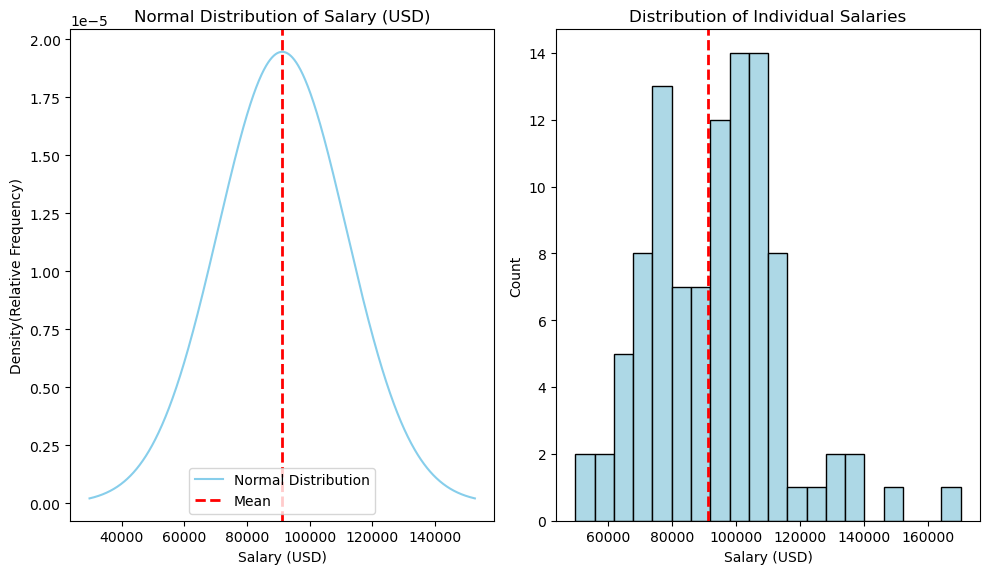

In [82]:

## Assuming you have already calculated mean_salary and std_salary
# Generate data points for the normal distribution
x = np.linspace(mean_salary - 3 * std_salary, mean_salary + 3 * std_salary, 1000)
y = norm.pdf(x, mean_salary, std_salary)

# Create a sample of individual salary values (you can replace this with your actual data)
individual_salaries = np.random.normal(mean_salary, std_salary, 100)

# Plot the normal distribution
plt.figure(figsize=(10, 6))

# Subplot 1: Normal distribution
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Normal Distribution', color='skyblue')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Normal Distribution of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Density(Relative Frequency)')
plt.legend()

# Subplot 2: Bar chart of individual salaries
plt.subplot(1, 2, 2)
plt.hist(individual_salaries, bins=20, color='lightblue', edgecolor='black')
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Individual Salaries')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


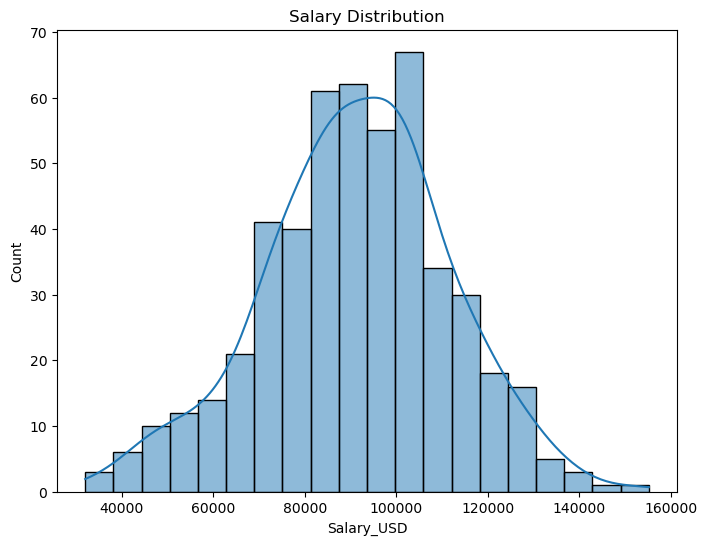

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(job_Market['Salary_USD'], kde=True)
plt.title('Salary Distribution')
plt.show()

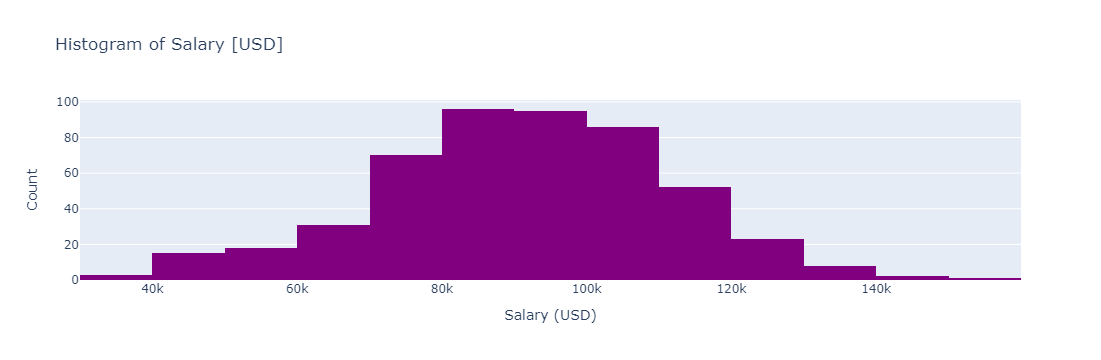

In [84]:
# Assuming you have a DataFrame called 'df' with a 'Salary_USD' column
fig = px.histogram(job_Market, x='Salary_USD', nbins=20, title='Histogram of Salary [USD]', color_discrete_sequence=['purple'])
fig.update_xaxes(title_text='Salary (USD)')
fig.update_yaxes(title_text='Count')

# Add tick labels to the x-axis
fig.update_xaxes(tickvals=[40000, 60000, 80000, 100000, 120000, 140000],ticktext=['40k', '60k', '80k', '100k', '120k', '140k'])

fig.show()

In [85]:
fig = px.bar(job_Market.groupby('Industry')['Salary_USD'].mean().reset_index(), 
              x = 'Industry', 
              y = 'Salary_USD', 
              title="Average Salary by Industry", 
              labels={'Salary_USD': 'Average Salary (USD)'},
              text_auto = True,
                color = 'Industry')
fig.show()

KeyError: 'Industry'

In [ ]:
fig = px.violin(job_Market, 
             x = 'Location', 
             y = 'Salary_USD', 
             title = "Salary Distribution by Location",
               color = 'Location',
               box = True,
               points = 'all',
               height = 800 
)
fig.show()

# AI Adoption


In [ ]:
value_counts=job_Market["AI_Adoption_Level"].value_counts()
value_counts

In [ ]:
colors = sns.color_palette('magma', len(value_counts))
plt.figure(figsize=(4, 4))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=50  
)
plt.title('Distribution of AI Adoption Levels')
plt.show()

In [ ]:
top_n = 20 
top_skills = job_Market['Required_Skills'].value_counts().nlargest(top_n).index
df_top = job_Market[job_Market['Required_Skills'].isin(top_skills)]

plt.figure(figsize=(10, 8))
sns.countplot(x='Required_Skills', hue='AI_Adoption_Level', data=df_top, order=top_skills)
plt.title(f"Top {top_n} Skill Frequencies of AI Adoption Levels")
plt.xlabel("Count")
plt.ylabel("Required Skills")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above visualisation displays the following : 


**Most In-Demand Skills**: Python, Data Analysis, and Machine Learning are the most frequently required skills across the dataset, indicating their central role in jobs involving AI.

**AI Adoption and Skill Frequency**: High AI adoption companies (green) require these technical skills more frequently, especially skills like Machine Learning, Python, and Data Analysis. This makes sense as these skills are crucial for developing and implementing AI systems.

**Non-Technical Skills**: Interestingly, non-technical skills like Communication and Project Management are also in demand, especially in Medium and Low AI adoption levels, suggesting that these skills are still crucial even in AI-driven industries.

**UX/UI Design**: This skill is highly demanded across all levels of AI adoption, highlighting its importance even in highly automated environments.

In [ ]:
fig = px.scatter(job_Market, x ='AI_Adoption_Level', 
                 y = 'Salary_USD', 
                 color = 'AI_Adoption_Level', 
                 title = "Salary vs. AI Adoption Level",
                height = 1000
                )
fig.show()

The above visualisation allows the projection of AI Adpotion against with the salary this gives a summary of the different salaries paid according to the AI Adption leve

In [ ]:
# 4. AI Adoption Level Impact on Remote Work
remote_ai_adoption_crosstab = pd.crosstab(job_Market['Remote_Friendly'], job_Market['AI_Adoption_Level'])
print("\nAI Adoption Level vs Remote Work Opportunity:")
print(remote_ai_adoption_crosstab)

# Visualization
sns.heatmap(remote_ai_adoption_crosstab, annot=True, cmap="YlGnBu")
plt.title("AI Adoption Level vs Remote Work Opportunity")
plt.show()

AI Adoption Level and Remote Work: The relationship between AI adoption level and remote work opportunity is inversely correlated. High AI adoption levels show a lower likelihood of jobs being remote-friendly (70), while low AI adoption levels correspond with a higher likelihood of remote-friendly jobs (94). This indicates that jobs with lower AI integration are more conducive to remote work.

Remote-Friendly Jobs:Remote-friendly jobs tend to cluster in environments with low AI adoption, with a strong presence (94). Conversely, high AI adoption jobs show less likelihood of being remote-friendly (70), suggesting that AI-driven environments may require more on-site presence.

# Remote Friendly 

In [89]:
job_Market["Remote_Friendly"].value_counts()

KeyError: 'Remote_Friendly'

In [90]:
fig = px.pie(job_Market, 
             names = 'Remote_Friendly', 
             title = "Remote Friendly Jobs",
            hole = 0.3)
fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['Salary_USD', 'Job_Title_Cybersecurity Analyst', 'Job_Title_Data Scientist', 'Job_Title_HR Manager', 'Job_Title_Marketing Specialist', 'Job_Title_Operations Manager', 'Job_Title_Product Manager', 'Job_Title_Sales Manager', 'Job_Title_Software Engineer', 'Job_Title_UX Designer', 'Industry_Energy', 'Industry_Entertainment', 'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing', 'Industry_Retail', 'Industry_Technology', 'Industry_Telecommunications', 'Industry_Transportation', 'Company_Size_Medium', 'Company_Size_Small', 'Location_Dubai', 'Location_London', 'Location_New York', 'Location_Paris', 'Location_San Francisco', 'Location_Singapore', 'Location_Sydney', 'Location_Tokyo', 'Location_Toronto', 'AI_Adoption_Level_Low', 'AI_Adoption_Level_Medium', 'Automation_Risk_Low', 'Automation_Risk_Medium', 'Required_Skills_Cybersecurity', 'Required_Skills_Data Analysis', 'Required_Skills_JavaScript', 'Required_Skills_Machine Learning', 'Required_Skills_Marketing', 'Required_Skills_Project Management', 'Required_Skills_Python', 'Required_Skills_Sales', 'Required_Skills_UX/UI Design', 'Remote_Friendly_Yes', 'Job_Growth_Projection_Growth', 'Job_Growth_Projection_Stable'] but received: Remote_Friendly

# Required Skill

In [91]:
value_counts = job_Market['Required_Skills'].value_counts().reset_index()
value_counts

KeyError: 'Required_Skills'

In [92]:
value_counts.columns = ['Required_Skills', 'Count']
fig = px.pie(
    value_counts,
    names='Required_Skills',
    values='Count',
    title='Distribution of Required Skills',
    color_discrete_sequence=px.colors.sequential.Plasma 
)
fig.update_layout(
    title_x=0.5 
)
fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['count'] but received: Required_Skills

# Industry

In [93]:
value_counts=job_Market.Industry.value_counts()
value_counts

AttributeError: 'DataFrame' object has no attribute 'Industry'

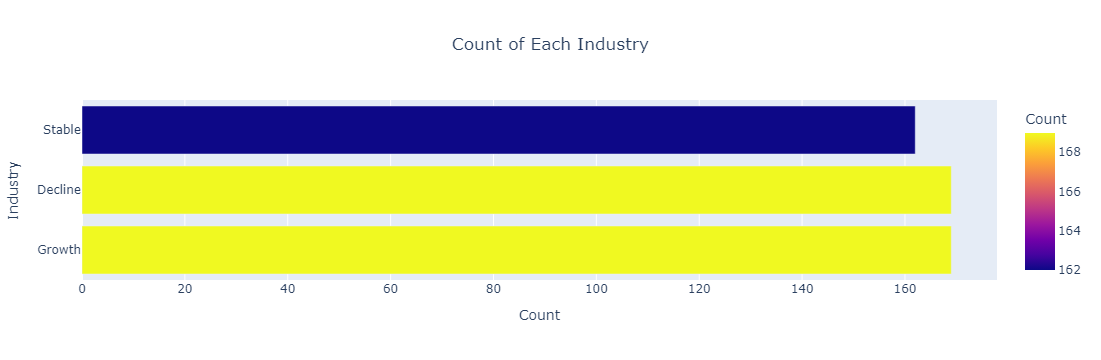

In [94]:
value_counts = value_counts.reset_index()
value_counts.columns = ['Industry', 'Count']

fig = px.bar(
    value_counts,
    y='Industry',
    x='Count',
    title='Count of Each Industry',
    labels={'Count': 'Count', 'Industry': 'Industry'},
    color='Count', 
    color_continuous_scale='Plasma'  
)

fig.update_layout(
    xaxis_title='Count',
    yaxis_title='Industry',
    title_x=0.5,  # Center the title
    yaxis=dict(
        tickangle=0  
    )
)

fig.show()

# Automation Risk


In [95]:
value_counts=job_Market.Automation_Risk.value_counts()
value_counts

AttributeError: 'DataFrame' object has no attribute 'Automation_Risk'

In [96]:
automation_risk = job_Market['Automation_Risk'].value_counts().reset_index()
automation_risk.columns = ['Automation_Risk','Count']
fig = px.bar(automation_risk, 
              x = 'Automation_Risk', 
              y = 'Count',
              title = "Automation Risk Distribution", 
              labels = {'Automation_Risk': 'Automation Risk', 'Automation_Risk': 'Count'},
            text_auto = True,
            color = 'Automation_Risk',
             height = 500
            )
fig.show()

KeyError: 'Automation_Risk'

# Job Growth Projection

In [97]:
value_counts=job_Market.Job_Growth_Projection.value_counts()
value_counts

AttributeError: 'DataFrame' object has no attribute 'Job_Growth_Projection'

In [98]:
growth_projection = job_Market['Job_Growth_Projection'].value_counts().reset_index()
growth_projection.columns =['Job_Growth_Projection','Count']
fig = px.bar(growth_projection, 
              x = 'Job_Growth_Projection', y = 'Count', 
              title = "Job Growth Projection Distribution", 
              labels = {'Job_Growth_Projection': 'Job Growth Projection', 'Job_Growth_Projection': 'Count'},
            text_auto = True,
            color = 'Job_Growth_Projection',
             height = 500
            )
fig.show()

KeyError: 'Job_Growth_Projection'

# Machine Learning

In [99]:
# Features (X) and Target (y)
X = job_Market.drop('Job_Growth_Projection_Growth', axis=1)
y = job_Market['Job_Growth_Projection_Growth']

# this code separates your dataset into features (X) and the target variable (y).
# X contains all the columns except for 'Salary_USD', which is what you're trying
# to predict and is stored in y.

In [100]:
from sklearn.model_selection import train_test_split

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# This code splits the dataset into training and testing sets,
# with 70% of the data allocated for training the model and 30% for testing its 
# performance.

In [101]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This code standardizes the features in the training and test datasets using
# StandardScaler. This process ensures that all features contribute equally to the 
# model, which can improve the performance of many machine learning algorithms. 

In [102]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# This code initializes a Random Forest regression model with 100 trees and trains
# it using the scaled training data. The model learns how to predict the target 
# variable (y_train) based on the features (X_train_scaled).

RandomForestRegressor(random_state=42)

In [103]:
from sklearn.metrics import mean_absolute_error, r2_score # imports two evaluation metrics from sklearn.metrics module.(mean_absolute_error and r2_score)   

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

#mean_absolute_error: Measures the average magnitude of the errors in a set of
# predictions, without considering their direction.

# r2_score: It provides a measure of how well the model fits the data.



Mean Absolute Error: 0.3376
R-squared: 0.20283796926667985


In [104]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression #imports the LinearRegression model, which is used for predicting continuous outcomes by fitting a straight line to the data.
from sklearn.tree import DecisionTreeRegressor #makes predictions by splitting the data into branches based on feature values. 
from sklearn.ensemble import GradientBoostingRegressor #an ensemble learning technique that combines multiple weak models (usually decision trees) to create a stronger model.
from sklearn.svm import SVR #(Support Vector Regression) model is used for predicting continuous outcomes.
from sklearn.metrics import mean_absolute_error, r2_score #These metrics are used to evaluate the performance of regression models
from sklearn.model_selection import cross_val_score #used to evaluate the model’s performance by splitting the dataset into multiple subsets 

# This code imports various regression models, evaluation metrics, and 
# cross-validation tools from Scikit-learn. These components will allow you to 
# build, evaluate, and compare the performance of different regression algorithms
# on your dataset

In [105]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Cross-validation score
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Linear Regression CV MAE: {-lr_cv_scores.mean():.2f}")

# Predict on the test set
lr_y_pred = lr_model.predict(X_test_scaled)

# Test set evaluation
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Linear Regression MAE: {lr_mae:.2f}, R-squared: {lr_r2:.2f}")

# This code trains a linear regression model on the scaled training data, 
# evaluates its performance using cross-validation and makes predictions on the 
# test set.It evaluates the model's performance on the test set using mean
# absolute error and R-squared, providing a comprehensive assessment of the model
# 's accuracy and fit.

Linear Regression CV MAE: 0.38
Linear Regression MAE: 0.38, R-squared: 0.17


In [106]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Cross-validation score
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Decision Tree CV MAE: {-dt_cv_scores.mean():.2f}")

# Predict on the test set
dt_y_pred = dt_model.predict(X_test_scaled)

# Test set evaluation
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)

print(f"Decision Tree MAE: {dt_mae:.2f}, R-squared: {dt_r2:.2f}")

# this code trains a decision tree regression model on the scaled training data,
# evaluates its performance using cross-validation (calculating the mean absolute
# error), and makes predictions on the test set. 

Decision Tree CV MAE: 0.36
Decision Tree MAE: 0.31, R-squared: -0.34


In [107]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Cross-validation score
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest CV MAE: {-rf_cv_scores.mean():.2f}")

# Predict on the test set
rf_y_pred = rf_model.predict(X_test_scaled)

# Test set evaluation
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest MAE: {rf_mae:.2f}, R-squared: {rf_r2:.2f}")

# this code trains a Random Forest regression model on the scaled training data, 
# evaluates its performance using cross-validation (calculating the mean absolute
# error), and makes predictions on the test set. Finally,

Random Forest CV MAE: 0.34
Random Forest MAE: 0.34, R-squared: 0.20


In [108]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Cross-validation score
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Gradient Boosting CV MAE: {-gb_cv_scores.mean():.2f}")

# Predict on the test set
gb_y_pred = gb_model.predict(X_test_scaled)

# Test set evaluation
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting MAE: {gb_mae:.2f}, R-squared: {gb_r2:.2f}")

# this code trains a Gradient Boosting regression model on the scaled training 
# data, evaluates its performance using cross-validation (calculating the mean 
# absolute error), and makes predictions on the test set.


Gradient Boosting CV MAE: 0.37
Gradient Boosting MAE: 0.37, R-squared: 0.16


In [109]:
# Initialize the SVR model
svr_model = SVR()

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Cross-validation score
svr_cv_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"SVR CV MAE: {-svr_cv_scores.mean():.2f}")

# Predict on the test set
svr_y_pred = svr_model.predict(X_test_scaled)

# Test set evaluation
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print(f"SVR MAE: {svr_mae:.2f}, R-squared: {svr_r2:.2f}")


SVR CV MAE: 0.39
SVR MAE: 0.40, R-squared: 0.07


In [110]:
# Summary of results
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae, svr_mae]
r2_values = [lr_r2, dt_r2, rf_r2, gb_r2, svr_r2]

# Print the table
print("\nModel Performance Comparison:")
for i in range(len(models)):
    print(f"{models[i]} - MAE: {mae_values[i]:.2f}, R-squared: {r2_values[i]:.2f}")

# The code effectively summarizes the performance metrics of the evaluated
# regression models, allowing for easy comparison of their predictive capabilities. 


Model Performance Comparison:
Linear Regression - MAE: 0.38, R-squared: 0.17
Decision Tree - MAE: 0.31, R-squared: -0.34
Random Forest - MAE: 0.34, R-squared: 0.20
Gradient Boosting - MAE: 0.37, R-squared: 0.16
SVR - MAE: 0.40, R-squared: 0.07


In [111]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create an instance of the Random Forest model (assuming rf_model is defined)
# rf_model = RandomForestRegressor()  # Uncomment this line if you haven't defined rf_model yet

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f"Best parameters for Random Forest: {grid_search.best_params_}")


# This code effectively sets up a grid search for tuning hyperparameters of the 
# Random Forest model. It defines a range of values to test for specific 
# hyperparameters, runs cross-validation to evaluate each combination, and 
# outputs the best-performing set of parameters.

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [112]:
# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']

# Mean Absolute Error for each model
mae_values = [lr_mae, dt_mae, rf_mae, gb_mae, svr_mae]

# R-squared for each model
r2_values = [lr_r2, dt_r2, rf_r2, gb_r2, svr_r2]

# Print the summary of test results
print("\nModel Performance Comparison:")
print("{:<20} {:<20} {:<20}".format('Model', 'MAE (Lower is better)', 'R-squared (Higher is better)'))
print("-" * 60)
for i in range(len(models)):
    print(f"{models[i]:<20} {mae_values[i]:<20.2f} {r2_values[i]:<20.2f}")

# This code creates a neatly formatted summary table that compares the performance
# of several regression models based on their Mean Absolute Error and R-squared
# values. 



Model Performance Comparison:
Model                MAE (Lower is better) R-squared (Higher is better)
------------------------------------------------------------
Linear Regression    0.38                 0.17                
Decision Tree        0.31                 -0.34               
Random Forest        0.34                 0.20                
Gradient Boosting    0.37                 0.16                
SVR                  0.40                 0.07                


In [114]:
 from sklearn.pipeline import Pipeline

# Generate a larger synthetic dataset
np.random.seed(42)
data_size = 200  # Increased size for better training
job_titles = ['Cybersecurity Analyst', 'Marketing Specialist', 'AI Researcher', 'Sales Manager']
job_growth_projection = ['True', 'False']

# Create a DataFrame
data = {
    'Job_Title': np.random.choice(job_titles, size=data_size),
    'Job_Growth_Projection': np.random.choice(job_growth_projection, size=data_size)
}

df = pd.DataFrame(data)

# Define features and target variable
X = df[['Job_Title']]
y = df['Job_Growth_Projection'].map({"True": True, "False": False})  # Map to boolean

# One-hot encode the categorical feature
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a pipeline for the Decision Tree Classifier
pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter tuning using Grid Search
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy: 52.50%

Classification Report:
               precision    recall  f1-score   support

       False       0.59      0.57      0.58        23
        True       0.44      0.47      0.46        17

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.53      0.53      0.53        40

